
<a id='uncertainty-traps'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Uncertainty Traps

## Contents

- [Uncertainty Traps](#Uncertainty-Traps)  
  - [Overview](#Overview)  
  - [The Model](#The-Model)  
  - [Implementation](#Implementation)  
  - [Results](#Results)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  
  - [Exercise 2](#Exercise-2)  

## Overview

In this lecture we study a simplified version of an uncertainty traps model of Fajgelbaum, Schaal and Taschereau-Dumouchel [[FSTD15]](../zreferences.html#fun).

The model features self-reinforcing uncertainty that has big impacts on economic activity.

In the model,

- Fundamentals  vary stochastically and are not fully observable.  
- At any moment there are both active and inactive entrepreneurs; only active entrepreneurs produce.  
- Agents – active and inactive entrepreuneurs –  have beliefs about the fundamentals expressed as probability distributions.  
- Greater uncertainty means greater dispersions of these distributions.  
- Entrepreneurs are risk averse and hence less inclined to be active  when uncertainty is high.  
- The output of active entrepreneurs is observable, supplying a noisy signal that helps everyone inside the model infer fundamentals.  
- Entrepreneurs update their beliefs about fundamentals using Bayes’ Law, implemented via [Kalman filtering](../tools_and_techniques/kalman.html).  


Uncertainty traps emerge because:

- High uncertainty discourages entrepreneurs from becoming active.  
- A low level of participation – i.e., a smaller number of active entrepreneurs – diminishes the flow of information about fundamentals.  
- Less information translates to higher uncertainty, further discouraging entrepreneurs from choosing to be active, and so on.  


Uncertainty traps stem from a positive externality: high aggregate economic activity levels generates valuable information.

## The Model

The original model described in [[FSTD15]](../zreferences.html#fun) has many interesting moving parts.

Here we examine a simplified version that nonetheless captures many of the key ideas.

### Fundamentals

The evolution of the fundamental process $ \{\theta_t\} $ is given by

$$
\theta_{t+1} = \rho \theta_t + \sigma_{\theta} w_{t+1}
$$

where

- $ \sigma_\theta > 0 $ and $ 0 < \rho < 1 $  
- $ \{w_t\} $ is IID and standard normal  


The random variable $ \theta_t $ is not observable at any time.

### Output

There is a total $ \bar M $ of risk averse entrepreneurs.

Output of the $ m $-th entrepreneur, conditional on being active in the market at
time $ t $, is equal to


<a id='equation-xgt'></a>
$$
x_m = \theta + \epsilon_m
\quad \text{where} \quad
\epsilon_m \sim N \left(0, \gamma_x^{-1} \right) \tag{1}
$$

Here the time subscript has been dropped to simplify notation.

The inverse of the shock variance, $ \gamma_x $, is called the shock’s **precision**.

The higher is the precision, the more informative $ x_m $ is about the fundamental.

Output shocks are independent across time and firms.

### Information and Beliefs

All entrepreneurs start with identical beliefs about $ \theta_0 $.

Signals are publicly observable and hence all agents have identical beliefs always.

Dropping time subscripts, beliefs for current $ \theta $ are represented by the normal
distribution $ N(\mu, \gamma^{-1}) $.

Here $ \gamma $ is the precision of beliefs; its inverse is the degree of uncertainty.

These parameters are updated by Kalman filtering.

Let

- $ \mathbb M \subset \{1, \ldots, \bar M\} $ denote the set of currently active firms  
- $ M := |\mathbb M| $ denote the number of currently active firms  
- $ X $ be the average output $ \frac{1}{M} \sum_{m \in \mathbb M} x_m $ of the active firms  


With this notation and primes for next period values, we can write the updating of the mean and precision via


<a id='equation-update-mean'></a>
$$
\mu' = \rho \frac{\gamma \mu + M \gamma_x X}{\gamma + M \gamma_x} \tag{2}
$$


<a id='equation-update-prec'></a>
$$
\gamma' =
    \left(
    \frac{\rho^2}{\gamma + M \gamma_x} + \sigma_\theta^2
    \right)^{-1} \tag{3}
$$

These are standard Kalman filtering results applied to the current setting.

Exercise 1 provides more details on how [(2)](#equation-update-mean) and [(3)](#equation-update-prec) are derived, and then asks you to fill in remaining steps.

The next figure plots the law of motion for the precision in [(3)](#equation-update-prec)
as a 45 degree diagram, with one curve for each $ M \in \{0, \ldots, 6\} $.

The other parameter values are $ \rho = 0.99, \gamma_x = 0.5, \sigma_\theta =0.5 $

<img src="_static/figures/uncertainty_traps_45.png" style="width:100%;">

  
Points where the curves hit the 45 degree lines are  long run steady
states for precision for different values of $ M $.

Thus, if one of these values for $ M $ remains fixed, a corresponding steady state is the equilibrium level of precision

- high values of $ M $ correspond to greater information about the
  fundamental, and hence more precision in steady state  
- low values of $ M $ correspond to less information and more uncertainty in steady state  


In practice, as we’ll see, the number of active firms fluctuates stochastically.

### Participation

Omitting time subscripts once more, entrepreneurs enter the market in the current period if


<a id='equation-pref1'></a>
$$
\mathbb E [ u(x_m - F_m) ] > c \tag{4}
$$

Here

- the mathematical expectation of $ x_m $ is based on [(1)](#equation-xgt) and beliefs $ N(\mu, \gamma^{-1}) $ for $ \theta $  
- $ F_m $ is a stochastic but previsible fixed cost, independent across time and firms  
- $ c $ is a constant reflecting opportunity costs  


The statement that $ F_m $ is previsible means that it is realized at the start of the period and treated as a constant in [(4)](#equation-pref1).

The utility function has the constant absolute risk aversion form


<a id='equation-pref2'></a>
$$
u(x) = \frac{1}{a} \left(1 - \exp(-a x) \right) \tag{5}
$$

where $ a $ is a positive parameter.

Combining [(4)](#equation-pref1) and [(5)](#equation-pref2), entrepreneur $ m $ participates in the market (or is said to be active) when

$$
\frac{1}{a}
    \left\{
        1 - \mathbb E [ \exp \left(
            -a (\theta + \epsilon_m -  F_m)
                \right) ]
    \right\}
        > c
$$

Using standard formulas for expectations of [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution) random variables, this is equivalent to the condition


<a id='equation-firm-test'></a>
$$
\psi(\mu, \gamma, F_m) :=
\frac{1}{a}
    \left(
        1 - \exp \left(
            -a \mu + a F_m +
            \frac{a^2 \left( \frac{1}{\gamma} + \frac{1}{\gamma_x} \right)}{2}
            \right)
    \right) - c > 0 \tag{6}
$$

## Implementation

We want to simulate this economy.

We’ll want a named tuple generator of the kind that we’ve seen before.

And we need methods to update $ \theta $, $ \mu $ and $ \gamma $, as well as to determine the number of active firms and their outputs.

The updating methods follow the laws of motion for $ \theta $, $ \mu $ and $ \gamma $ given above.

The method to evaluate the number of active firms generates $ F_1,
\ldots, F_{\bar M} $ and tests condition [(6)](#equation-firm-test) for each firm.

### Setup

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0")
# uncomment to force package installation and precompilation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.7.0", instantiate=true, precompile = true)

In [2]:
using LinearAlgebra, Statistics
using DataFrames, Parameters, Plots

In [3]:
UncertaintyTrapEcon = @with_kw (a = 1.5, # risk aversion
                                γ_x = 0.5, # production shock precision
                                ρ = 0.99, # correlation coefficient for θ
                                σ_θ = 0.5, # standard dev. of θ shock
                                num_firms = 100, # number of firms
                                σ_F = 1.5, # standard dev. of fixed costs
                                c = -420.0, # external opportunity cost
                                μ_init = 0.0, # initial value for μ
                                γ_init = 4.0, # initial value for γ
                                θ_init = 0.0, # initial value for θ
                                σ_x = sqrt(a / γ_x)) # standard dev. of shock

##NamedTuple_kw#253 (generic function with 2 methods)

In the results below we use this code to simulate time series for the major variables.

## Results

Let’s look first at the dynamics of $ \mu $, which the agents use to track $ \theta $

<img src="_static/figures/uncertainty_traps_mu.png" style="width:100%;">

  
We see that $ \mu $ tracks $ \theta $ well when there are sufficient firms in the market.

However, there are times when $ \mu $ tracks $ \theta $ poorly due to
insufficient information.

These are episodes where the uncertainty traps take hold.

During these episodes

- precision is low and uncertainty is high  
- few firms are in the market  


To get a clearer idea of the dynamics, let’s look at all the main time series
at once, for a given set of shocks

<img src="_static/figures/uncertainty_traps_sim.png" style="width:100%;">

  
Notice how the traps only take hold after a sequence of bad draws for the fundamental.

Thus, the model gives us a *propagation mechanism* that maps bad random draws into long downturns in economic activity.

## Exercises


<a id='uncertainty-traps-ex1'></a>

### Exercise 1

Fill in the details behind [(2)](#equation-update-mean) and [(3)](#equation-update-prec) based on
the following standard result (see, e.g., p. 24 of [[YS05]](../zreferences.html#young2005)).

**Fact** Let $ \mathbf x = (x_1, \ldots, x_M) $ be a vector of IID draws
from common distribution $ N(\theta, 1/\gamma_x) $
and let $ \bar x $ be the sample mean.  If $ \gamma_x $
is known and the prior for $ \theta $ is $ N(\mu, 1/\gamma) $, then the posterior
distribution of $ \theta $ given $ \mathbf x $ is

$$
\pi(\theta \,|\, \mathbf x) = N(\mu_0, 1/\gamma_0)
$$

where

$$
\mu_0 = \frac{\mu \gamma + M \bar x \gamma_x}{\gamma + M \gamma_x}
\quad \text{and} \quad
\gamma_0 = \gamma + M \gamma_x
$$

### Exercise 2

Modulo randomness, replicate the simulation figures shown above

- Use the parameter values listed as defaults in the function UncertaintyTrapEcon.  

## Solutions

### Exercise 1

This exercise asked you to validate the laws of motion for
$ \gamma $ and $ \mu $ given in the lecture, based on the stated
result about Bayesian updating in a scalar Gaussian setting.

The stated result tells us that after observing average output $ X $ of the
$ M $ firms, our posterior beliefs will be

$$
N(\mu_0, 1/\gamma_0)
$$

where

$$
\mu_0 = \frac{\mu \gamma + M X \gamma_x}{\gamma + M \gamma_x}
\quad \text{and} \quad
\gamma_0 = \gamma + M \gamma_x
$$

If we take a random variable $ \theta $ with this distribution and
then evaluate the distribution of $ \rho \theta + \sigma_\theta w $
where $ w $ is independent and standard normal, we get the
expressions for $ \mu' $ and $ \gamma' $ given in the lecture.

## Exercise 2

First let’s replicate the plot that illustrates the law of motion for
precision, which is

$$
\gamma_{t+1} =
    \left(
    \frac{\rho^2}{\gamma_t + M \gamma_x} + \sigma_\theta^2
    \right)^{-1}
$$

Here $ M $ is the number of active firms. The next figure plots
$ \gamma_{t+1} $ against $ \gamma_t $ on a 45 degree diagram for
different values of $ M $

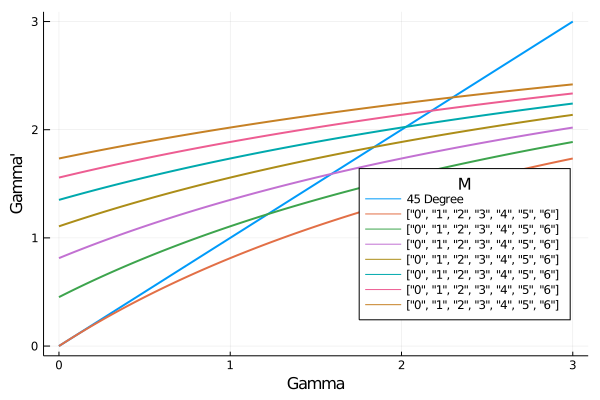

In [4]:
econ = UncertaintyTrapEcon()
@unpack ρ, σ_θ, γ_x = econ # simplify names

# grid for γ and γ_{t+1}
γ = range(1e-10, 3, length = 200)
M_range = 0:6
γp = 1 ./ (ρ^2 ./ (γ .+ γ_x .* M_range') .+ σ_θ^2)

labels = ["0", "1", "2", "3", "4", "5", "6"]

plot(γ, γ, lw = 2, label = "45 Degree")
plot!(γ, γp, lw = 2, label = labels)
plot!(xlabel = "Gamma", ylabel = "Gamma'", legend_title = "M", legend = :bottomright)

The points where the curves hit the 45 degree lines are the long run
steady states corresponding to each $ M $, if that value of
$ M $ was to remain fixed. As the number of firms falls, so does the
long run steady state of precision.

Next let’s generate time series for beliefs and the aggregates – that
is, the number of active firms and average output

In [5]:
function simulate(uc, capT = 2_000)
    # unpack parameters
    @unpack a, γ_x, ρ, σ_θ, num_firms, σ_F, c, μ_init, γ_init, θ_init, σ_x = uc

    # draw standard normal shocks
    w_shocks = randn(capT)

    # aggregate functions
    # auxiliary function ψ
    function ψ(γ, μ, F)
        temp1 = -a * (μ - F)
        temp2 = 0.5 * a^2 / (γ + γ_x)
        return (1 - exp(temp1 + temp2)) / a - c
    end

    # compute X, M
    function gen_aggregates(γ, μ, θ)
        F_vals = σ_F * randn(num_firms)
        M = sum(ψ.(Ref(γ), Ref(μ), F_vals) .> 0) # counts number of active firms
        if any(ψ(γ, μ, f) > 0 for f in F_vals) # ∃ an active firm
            x_vals = θ .+ σ_x * randn(M)
            X = mean(x_vals)
        else
            X = 0.0
        end
        return (X = X, M = M)
    end

    # initialize dataframe
    X_init, M_init = gen_aggregates(γ_init, μ_init, θ_init)
    df = DataFrame(γ = γ_init, μ = μ_init, θ = θ_init, X = X_init, M = M_init)

    # update dataframe
    for t in 2:capT
        # unpack old variables
        θ_old, γ_old, μ_old, X_old, M_old = (df.θ[end], df.γ[end], df.μ[end], df.X[end], df.M[end])

        # define new beliefs
        θ = ρ * θ_old + σ_θ * w_shocks[t-1]
        μ = (ρ * (γ_old * μ_old + M_old * γ_x * X_old))/(γ_old + M_old * γ_x)
        γ = 1 / (ρ^2 / (γ_old + M_old * γ_x) + σ_θ^2)

        # compute new aggregates
        X, M = gen_aggregates(γ, μ, θ)
        push!(df, (γ = γ, μ = μ, θ = θ, X = X, M = M))
    end

    # return
    return df
end

simulate (generic function with 2 methods)

First let’s see how well $ \mu $ tracks $ \theta $ in these
simulations

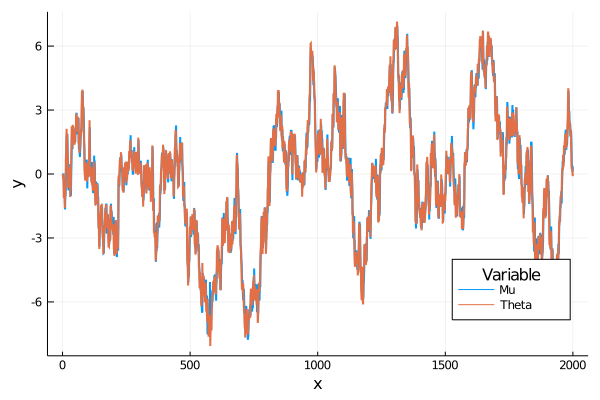

In [6]:
df = simulate(econ)

plot(eachindex(df.μ), df.μ, lw = 2, label = "Mu")
plot!(eachindex(df.θ), df.θ, lw = 2, label = "Theta")
plot!(xlabel = "x", ylabel = "y", legend_title = "Variable", legend = :bottomright)

Now let’s plot the whole thing together

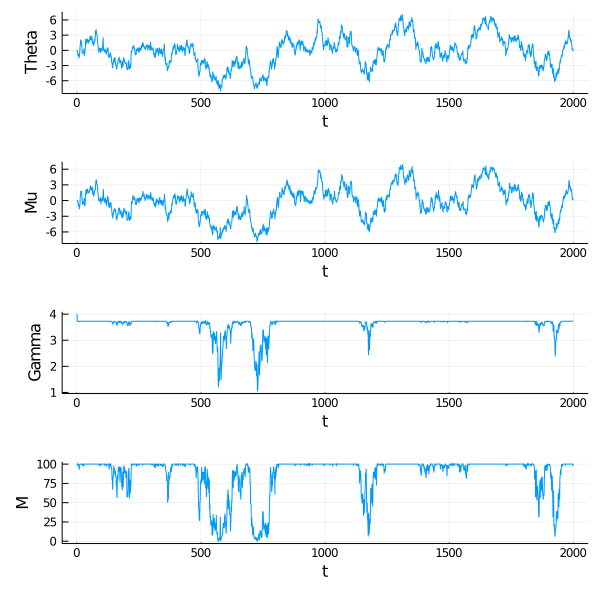

In [7]:
len = eachindex(df.θ)
yvals = [df.θ, df.μ, df.γ, df.M]
vars = ["Theta", "Mu", "Gamma", "M"]

plt = plot(layout = (4,1), size = (600, 600))

for i in 1:4
    plot!(plt[i], len, yvals[i], xlabel = "t", ylabel = vars[i], label = "")
end

plot(plt)